## Lab 8

### Zad A

### Zad 1

In [2]:
using Roots, ForwardDiff, DataFrames, Plots, Symbolics

In [3]:
functions = Function[]

f1(x) = sin(x) - x/2
f2(x) = cos(x) - x
f3(x) = (x+3)*(x-1)^2
f4(x) = 2 * x - exp(-x)
f5(x) = x * exp(-x)
f6(x) = 20.0*x/(100.0*x*x+1.0)

push!(functions, f1)
push!(functions, f2)
push!(functions, f3)
push!(functions, f4)
push!(functions, f5)
push!(functions, f6)

D(f) = x->ForwardDiff.derivative(f, float(x)) 
df = DataFrame(fun=Function[], method=Function[], Iters=Float64[], Calls=Float64[])

tracker = Roots.Tracks()
bisection(f) = find_zero(f, (0, 1), Bisection(), tracks = tracker) 
newtonMethod(f) = find_zero((f, D(f)), 0, Roots.Newton(), tracks = tracker)
steffenson(f) = find_zero(f, 0, Order2(), tracks = tracker)

for fun in functions
    res1 = bisection(fun)
    if fun(res1) != 0
        println("Error ocured ", fun, " ", bisection," ", fun(res1))
    end
    push!(df,(fun, bisection, tracker.steps, tracker.fncalls))
    res2 = newtonMethod(fun)
    if fun(res2) != 0
        println("Error ocured ", fun, " ", newtonMethod," ", fun(res2))
    end
    push!(df,(fun, newtonMethod, tracker.steps, tracker.fncalls))
    res3 = steffenson(fun)
    if fun(res3) != 0
        println("Error ocured ", fun, " ", steffenson, " ", fun(res3))
    end
    push!(df,(fun, steffenson, tracker.steps, tracker.fncalls))
end

show(df, allrows=true)

Error ocured f3 newtonMethod 4.564959859473074e-16
Error ocured f3 steffenson 5.483192153677992e-16
Error ocured f4 newtonMethod -1.1102230246251565e-16
18×4 DataFrame
 Row │ fun       method        Iters    Calls   
     │ Function  Function      Float64  Float64 
─────┼──────────────────────────────────────────
   1 │ f1        bisection         0.0      3.0
   2 │ f1        newtonMethod      1.0      5.0
   3 │ f1        steffenson        1.0      7.0
   4 │ f2        bisection        61.0     70.0
   5 │ f2        newtonMethod     66.0     80.0
   6 │ f2        steffenson       72.0     90.0
   7 │ f3        bisection        72.0     93.0
   8 │ f3        newtonMethod     98.0    145.0
   9 │ f3        steffenson      126.0    195.0
  10 │ f4        bisection       187.0    259.0
  11 │ f4        newtonMethod    191.0    267.0
  12 │ f4        steffenson      196.0    276.0
  13 │ f5        bisection       196.0    279.0
  14 │ f5        newtonMethod    197.0    281.0
  15 │ f5    

### Zad 2

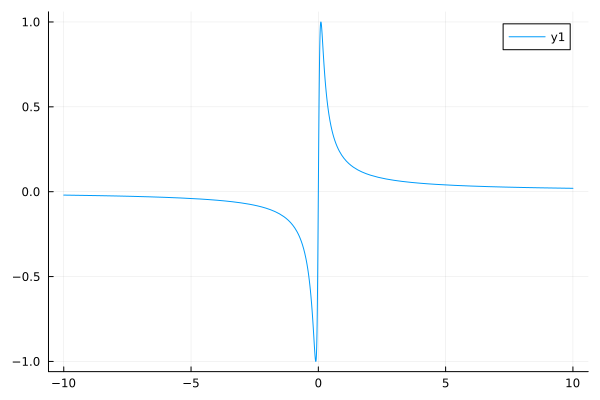

In [4]:
Repeller(x) = 20.0*x/(100.0*x*x+1.0)
xs = -10:10
plot(Repeller, extrema(xs)...)

In [5]:
df2 = DataFrame(method=Function[], Iters=Float64[], Calls=Float64[])
bisection(Repeller)
push!(df2 ,(bisection, tracker.steps, tracker.fncalls))
newtonMethod(Repeller)
push!(df2 ,(newtonMethod,tracker.steps, tracker.fncalls))
steffenson(Repeller)
push!(df2 ,(steffenson, tracker.steps, tracker.fncalls))

Row,method,Iters,Calls
,Function,Float64,Float64
1,bisection,198.0,293.0
2,newtonMethod,199.0,295.0
3,steffenson,199.0,297.0


### zad 3

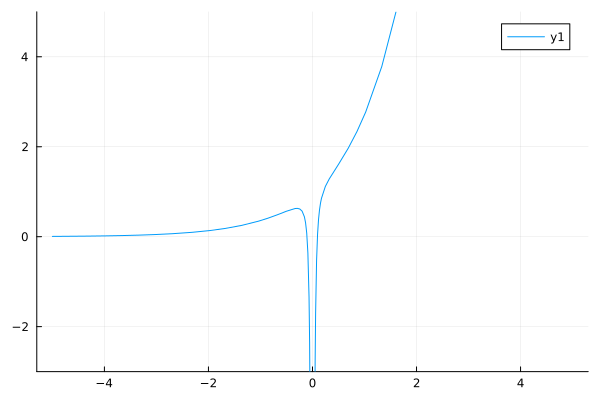

In [6]:
f(x) = exp( x ) - 1 / ( 10 * x )^2
plot(f, ylim = (-3,5))

#### Bisekcja

wartości funkcji na krańcach przedziału muszą mieć różne znaki

In [7]:
f(x) = exp( x ) - 1 / ( 10 * x )^2
res1 = find_zero(f, (-1,10), Bisection()) 
f(res1)

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



po zmianie przedziału zauważam, że metoda dziła poprawnie


In [8]:
f(x) = exp( x ) - 1 / ( 10 * x )^2
res1 = find_zero(f, (-1,0.01), Bisection()) 
f(res1)

1.1102230246251565e-16

#### Steffensen

metoda Steffensena nie działa ze względu na nieciągłość funkcji w  x = 0 + funckja w punkcie startowym x = 0 nie istnieje

In [9]:
f(x) = exp( x ) - 1 / ( 10 * x )^2
res2 = find_zero(f, 0, Order2())
f(res2)

LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

gdy zmienimy punkt startowy to zauważymy, że metoda działa poprawnie

In [10]:
f(x) = exp( x ) - 1 / ( 10 * x )^2
res2 = find_zero(f, 1, Order2())
f(res2)

4.9203805092823405e-16

#### Newtowna

metoda Newton'a zawodzi, ponieważ pochodna w x = 0 (punkt startowy) jest równa 0

In [11]:
f(x) = x^3
res3 = find_zero((f, D(f)), 0, Roots.Newton())
f(res3)

LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

po zmianie punktu starotwego metoda działa

In [12]:
f(x) = x^3
res3 = find_zero((f, D(f)), 1, Roots.Newton())
f(res3)

4.786967314877968e-16

### Zad B

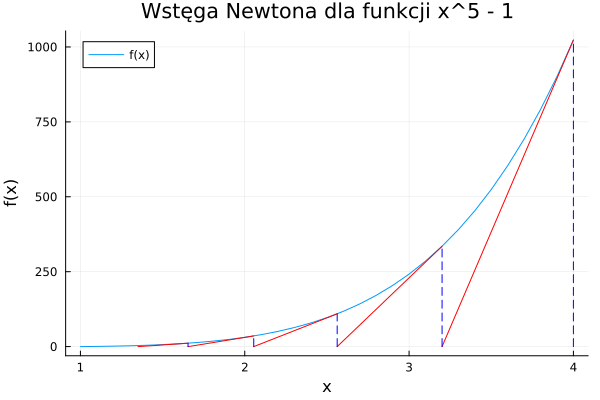

In [13]:
f(x) = x^5-1
f_prime(x) = 5x^4

x0 = 4.0
num_iterations = 5
x_range = 1:0.1:4

plot(x_range, f, label="f(x)")

# Iteracyjnie obliczamy kolejne przybliżenia i rysujemy linie
x_prev = x0
for i in 1:num_iterations
    x_next = x_prev - f(x_prev) / f_prime(x_prev)
    plot!([x_prev, x_prev], [0, f(x_prev)], color=:blue, linestyle=:dash, label="")
    plot!([x_prev, x_next], [f(x_prev), 0], color=:red, label="")
    x_prev = x_next
end

xlabel!("x")
ylabel!("f(x)")
title!("Wstęga Newtona dla funkcji x^5 - 1")

Wstęga Newtona jest wyobrażeniem, które ilustruje, jak kolejne iteracje metody Newtona prowadzą do przybliżania się do pierwiastka funkcji. Każda iteracja metody Newtona tworzy "pasek" (wstęgę) na płaszczyźnie, który jest prostopadły do osi x i przechodzi przez kolejne punkty przybliżenia.

Kiedy proces iteracyjny jest zbieżny, wstęga Newtona stopniowo zwęża się wokół rzeczywistego pierwiastka funkcji. W przypadku zbieżności, wstęga Newtona może nawet stać się punktem, gdy kolejne przybliżenia zbliżają się do pierwiastka.

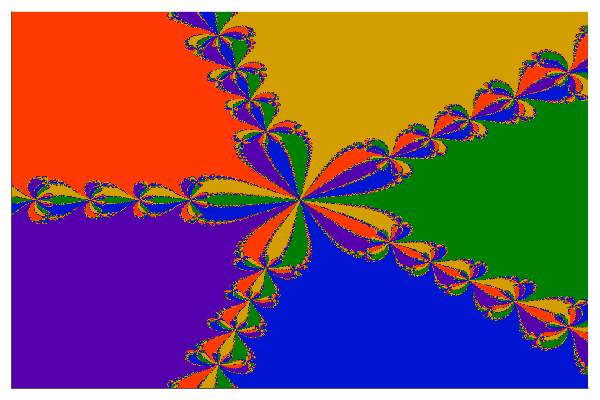

In [14]:
f(x) = x^5 - 1

function get_map(f)
    @variables x
    Dx = Differential(x)
    map = x - f(x) / Dx(f(x)) |> expand_derivatives
    update_expr = build_function(map, x)
    return eval(update_expr)
end

function applyiteratively(x, update; n=100)
    for i in 1:n
        x = update(x)
    end
    return x
end

lower = -2 - 2im
upper = 2 + 2im
step = 0.5e-2
Z0 = [a+b*im for b in real(lower):step:real(upper),
                    a in imag(lower):step:imag(upper)]

Z100 = applyiteratively.(Z0, get_map(f))
heatmap(angle.(Z100), colorbar=false, color=:rainbow, ticks=false)

W jaki sposób powstała wstęga Newtona w prezentowanym kodzie?


1. Generowanie punktów początkowych: Pierwszym krokiem jest wygenerowanie punktów początkowych, które stanowią początkowe przybliżenia pierwiastków funkcji na płaszczyźnie zespolonej. W prezentowanym kodzie użyłem dwuwymiarowej tablicy punktów Z0, gdzie każdy punkt reprezentuje jedno początkowe przybliżenie.
2. Iteracyjne stosowanie metody Newtona: Następnie, dla każdego początkowego przybliżenia, iteracyjnie stosowana jest metoda Newtona, aby uzyskać kolejne przybliżenia pierwiastków funkcji. Każda iteracja metody Newtona prowadzi do aktualizacji przybliżenia na podstawie poprzedniego przybliżenia i pochodnej funkcji w tym punkcie.
3. Zapisanie faz punktów: Dla każdego punktu początkowego i każdej iteracji, obliczany jest kąt (faza) pierwiastka funkcji w danym punkcie na płaszczyźnie zespolonej. Kąt ten jest zapisywany jako wartość w macierzy Z100.
4. Wizualizacja wstęgi Newtona: Ostatecznie, wykorzystując funkcję heatmap, przedstawiona jest wizualizacja zmian fazowych punktów w kolejnych iteracjach metody Newtona na płaszczyźnie zespolonej. Wstęga Newtona powstaje poprzez kolorowanie punktów w zależności od ich faz po zastosowaniu metody Newtona.

Jaki jest związek wstęgi Newtona z metodą Newtona do znajdowania pierwiastków?

- Wstęga Newtona pokazuje, jak kolejne iteracje metody Newtona prowadzą do zbliżania się do rzeczywistego pierwiastka funkcji.
- Każda linia pozioma w wstędze reprezentuje jedno początkowe przybliżenie, a kolor punktów na linii odpowiada fazie (kątowi) pierwiastka w kolejnych iteracjach metody Newtona.
- Szerokość wstęgi odzwierciedla szybkość zbieżności metody Newtona. Im węższa wstęga, tym szybsza zbieżność do pierwiastka, a im szersza, tym wolniejsza zbieżność.